# Based on the papers

[1] https://journals.aps.org/rmp/pdf/10.1103/RevModPhys.35.457

and

[2] https://doi.org/10.1063/1.1681683

In [1]:
import numpy as np
import sympy as sym

sym.init_printing()

In [2]:
cos = sym.cos
sin = sym.sin

# Angles $\alpha$ and $\gamma$

In [3]:
a, g = sym.symbols("alpha gamma", real=True)
a, g

# Original, unrotated orbitals $\phi_1$ and $\phi_2$

In [4]:
p1, p2 = sym.symbols("phi_1 phi_2", real=True)
p1, p2

# Matrix elements/expectation values of a 1-electron operator $\mathbf{\hat{\mu}}$ over unrotated orbitals $\phi_1$ and $\phi_2$: $\mu_{11}$, $\mu_{22}$ and $\mu_{12}$

In [5]:
m11, m22, m12 = sym.symbols("mu_11 mu_22 mu_12", real=True)
m11, m22, m12

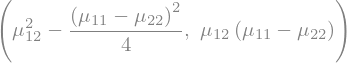

In [6]:
A12 = m12**2 - sym.Rational(1, 4) * (m11 - m22)**2
B12 = (m11 - m22) * m12
A12, B12

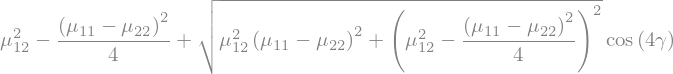

In [7]:
ref_diff = A12 + sym.sqrt(A12**2 + B12**2) * cos(4*g)
ref_diff

# Expecation values of $\mathbf{\hat{\mu}}$ over rotated orbitals $u_1$ and $u_2$ in terms of matrix elements over unrotated orbitals $\phi_1$ and $\phi_2$

$$
\begin{align}
u_1 &= \cos(\gamma) \phi_1 + \sin(\gamma) \phi_2 \\
u_2 &= -\sin(\gamma) \phi_1 + \cos(\gamma) \phi_2
\end{align}
$$

In [8]:
u1 = cos(g) * p1 + sin(g) * p2
u2 = -sin(g) * p1 + cos(g) * p2
u1, u2

In [9]:
subs = {
    p1**2: m11,
    p1*p2: m12,
    p2*p1: m12,
    p2**2: m22,
}

In [10]:
u11 = (u1**2).expand().subs(subs)
u11

In [11]:
u22 = (u2**2).expand().subs(subs)
u22

In [12]:
u22 = sin(g)**2 * m11 - 2 * cos(g) * sin(g) * m12 + cos(g)**2 * m22
u22

# Cost function over two rotated orbitals $u_1$ and $u_2$

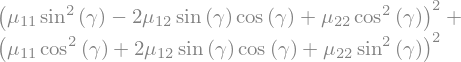

In [13]:
D = u11**2 + u22**2
D

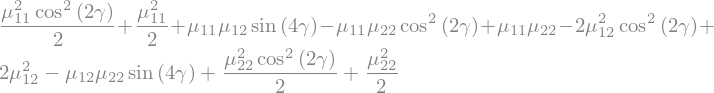

In [14]:
D1 = D.expand().simplify()
D1

# Substitute using Pythagorean trigonometric identity $\cos^2(x) + \sin^2(x) = 1$

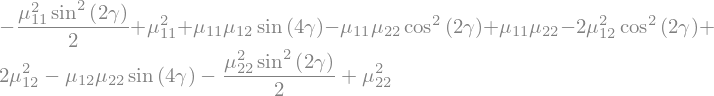

In [15]:
subs1 = {
    (m11**2 * cos(2*g)**2) / 2: (m11**2 * (1  - sin(2*g)**2)) / 2,
    (m22**2 * cos(2*g)**2) / 2: (m22**2 * (1  - sin(2*g)**2)) / 2,
}
D2 = D1.subs(subs1).simplify()
D2

# Substract original cost function that does not depend on the rotation angle $\gamma$

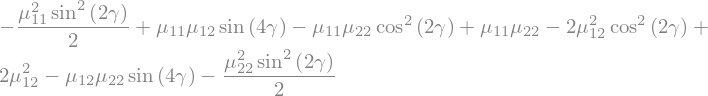

In [16]:
D3 = D2 - m11**2 - m22**2
D3

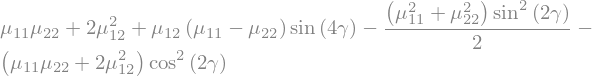

In [17]:
D4 = D3.collect(-sin(2*g)**2 / 2).collect(sin(4*g)).collect(cos(2*g)**2).simplify()
D4

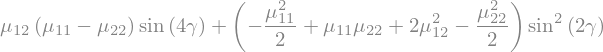

In [18]:
D4_1 = D4.collect(m11*m22 + 2*m12**2).subs(1-cos(2*g)**2, sin(2*g)**2).collect(sin(2*g)**2)
D4_1

In [19]:
assert (D4_1 + m11**2 + m22**2 - D).simplify() == 0

# Calculate derivative w.r.t. $\gamma$ to determine extremal points

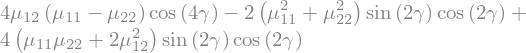

In [20]:
sym.diff(D4, g)

In [21]:
D5 = sym.diff(D4, g).simplify().collect(sin(4*g))
D5

In [22]:
A, B = sym.symbols("A B")
A, B

In [23]:
subs2 = {
    4 * m12 * (m11 - m22): A,
    (-m11**2 + 2*m11*m22 + 4*m12**2 - m22*2): B,
}
D5.subs(subs2)  

# Substitution of second prefactor does not seem to work ...

In [24]:
D6 = A * cos(4*g) + B * sin(4*g)
D6

# Solve for $\gamma$

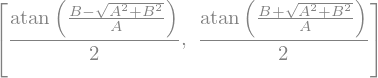

In [25]:
gammas_extrem = sym.solve(D6, g)
gammas_extrem

# Second derivative w.r.t. $\gamma$

In [32]:
D7 = sym.diff(D5, g).simplify()
D7